In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np

In [2]:
!pip install pydotplus

In [3]:
import pydotplus
import os

In [4]:
tennis_data = pd.read_csv("play_tennis.csv")
tennis_data

,Outlook,Humidity,Wind,PlayTennis
0,Sunny,High,Weak,No
1,Sunny,High,Strong,No
2,Overcast,High,Weak,Yes
3,Rain,High,Weak,Yes
4,Rain,Normal,Strong,Yes
5,Rain,Normal,Strong,No
6,Overcast,Normal,Weak,Yes
7,Sunny,High,Weak,No
8,Sunny,Normal,Weak,Yes
9,Rain,High,Weak,No


In [5]:
tennis_data.Outlook = tennis_data.Outlook.replace("Sunny", 0)
tennis_data.Outlook = tennis_data.Outlook.replace("Overcast", 1)
tennis_data.Outlook = tennis_data.Outlook.replace("Rain", 2)

tennis_data.Humidity = tennis_data.Humidity.replace("High", 1)
tennis_data.Humidity = tennis_data.Humidity.replace("Normal", 2)

tennis_data.Wind = tennis_data.Wind.replace("Weak", 1)
tennis_data.Wind = tennis_data.Wind.replace("Strong", 2)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace("No", 1)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace("Yes", 2)

tennis_data

,Outlook,Humidity,Wind,PlayTennis
0,0,1,1,1
1,0,1,2,1
2,1,1,1,2
3,2,1,1,2
4,2,2,2,2
5,2,2,2,1
6,1,2,1,2
7,0,1,1,1
8,0,2,1,2
9,2,1,1,1


In [8]:
#변수 tennis_data 컬럼의 값들을 데이터프레임 형태로 추출 후 배열 형태로 변환
X = np.array(pd.DataFrame(tennis_data, columns = ["Outlook","Humidity","Wind"]))
y = np.array(pd.DataFrame(tennis_data, columns = ["PlayTennis"]))
X, y

(array([[0, 1, 1],
        [0, 1, 2],
        [1, 1, 1],
        [2, 1, 1],
        [2, 2, 2],
        [2, 2, 2],
        [1, 2, 1],
        [0, 1, 1],
        [0, 2, 1],
        [2, 1, 1],
        [0, 2, 2],
        [1, 1, 1],
        [1, 2, 1],
        [2, 1, 2],
        [2, 1, 1],
        [1, 2, 2],
        [0, 1, 1]], dtype=int64), array([[1],
        [1],
        [2],
        [2],
        [2],
        [1],
        [2],
        [1],
        [2],
        [1],
        [2],
        [2],
        [1],
        [1],
        [1],
        [2],
        [1]], dtype=int64))

In [9]:
X_train = X[0:14]
X_test = X[14:]
y_train = y[0:14]
y_test = y[14:]

In [12]:
dt_clf = DecisionTreeClassifier()
dt_clf = df_clf.fit(X_train, y_train)

In [13]:
# y=f(x), predict은 f함수 구한다. 그래서 prediction에 대입.
dt_prediction = dt_clf.predict(X_test)

In [14]:
print(confusion_matrix(y_test, dt_prediction))

[[2 0]
 [1 0]]


In [15]:
# accuracy 정확도
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, dt_prediction)
print("정확도:", accuracy)

정확도: 0.6666666666666666


In [16]:
os.environ["PATH"]+=os.pathsep+"C:/ai/program/Graphviz/bin"
os.environ["PATH"]

'C:\\ai\\python\\anaconda3;C:\\ai\\python\\anaconda3\\Library\\mingw-w64\\bin;C:\\ai\\python\\anaconda3\\Library\\usr\\bin;C:\\ai\\python\\anaconda3\\Library\\bin;C:\\ai\\python\\anaconda3\\Scripts;C:\\ai\\python\\anaconda3\\bin;C:\\ai\\python\\anaconda3\\condabin;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Windows\\System32\\OpenSSH\\;C:\\Program Files\\Git\\cmd;C:\\Program Files\\Java\\jdk1.8.0_231\\bin;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files\\Java\\apache-maven-3.6.2\\bin;C:\\Program Files\\Java\\apache-tomcat-9.0.27\\bin;C:\\Users\\student\\AppData\\Local\\Microsoft\\WindowsApps;;C:\\Users\\student\\AppData\\Local\\Programs\\Microsoft VS Code\\bin;C:\\Program Files\\Bandizip\\;C:\\Program Files\\Docker Toolbox;C:/ai/program/Graphviz/bin'

In [18]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = ["Outlook", "Humidity", "Wind"],
                                   class_names = ["No","Yes"],
                                   filled = True,
                                   rounded = True,
                                   special_characters = True
                                  )
dt_dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<Humidity &le; 1.5<br/>gini = 0.5<br/>samples = 14<br/>value = [7, 7]<br/>class = No>, fillcolor="#e5813900"] ;\n1 [label=<Outlook &le; 0.5<br/>gini = 0.469<br/>samples = 8<br/>value = [5, 3]<br/>class = No>, fillcolor="#e5813966"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<gini = 0.0<br/>samples = 3<br/>value = [3, 0]<br/>class = No>, fillcolor="#e58139ff"] ;\n1 -> 2 ;\n3 [label=<Outlook &le; 1.5<br/>gini = 0.48<br/>samples = 5<br/>value = [2, 3]<br/>class = Yes>, fillcolor="#399de555"] ;\n1 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = Yes>, fillcolor="#399de5ff"] ;\n3 -> 4 ;\n5 [label=<Wind &le; 1.5<br/>gini = 0.444<br/>samples = 3<br/>value = [2, 1]<br/>class = No>, fillcolor="#e581397f"] ;\n3 -> 5 ;\n6 [label=<gini = 0.5<br/>samples = 2<br/>value = [1, 1]<br/>class = No>, fillcolor="#e5

In [19]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

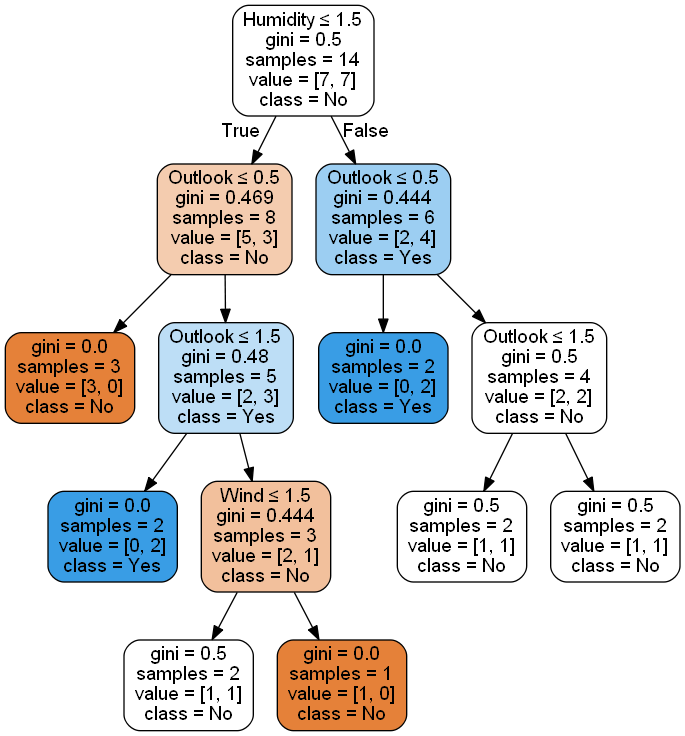

In [20]:
Image(dt_graph.create_png())